# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA


In [2]:

sales_data = pd.read_csv('/Users/blairjdaniel/lighthouse/lighthouse/ml-project-unsupervised-learning/Cluster-Wholesale_data/Wholesale_Data.csv')
sales_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
missing_data = sales_data.isnull().sum()
sales_data_clean = sales_data.dropna()


In [5]:
cols = ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
sales_data_clean = sales_data_clean[sales_data_clean[cols] >= 0]

In [6]:
sales_data_clean.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


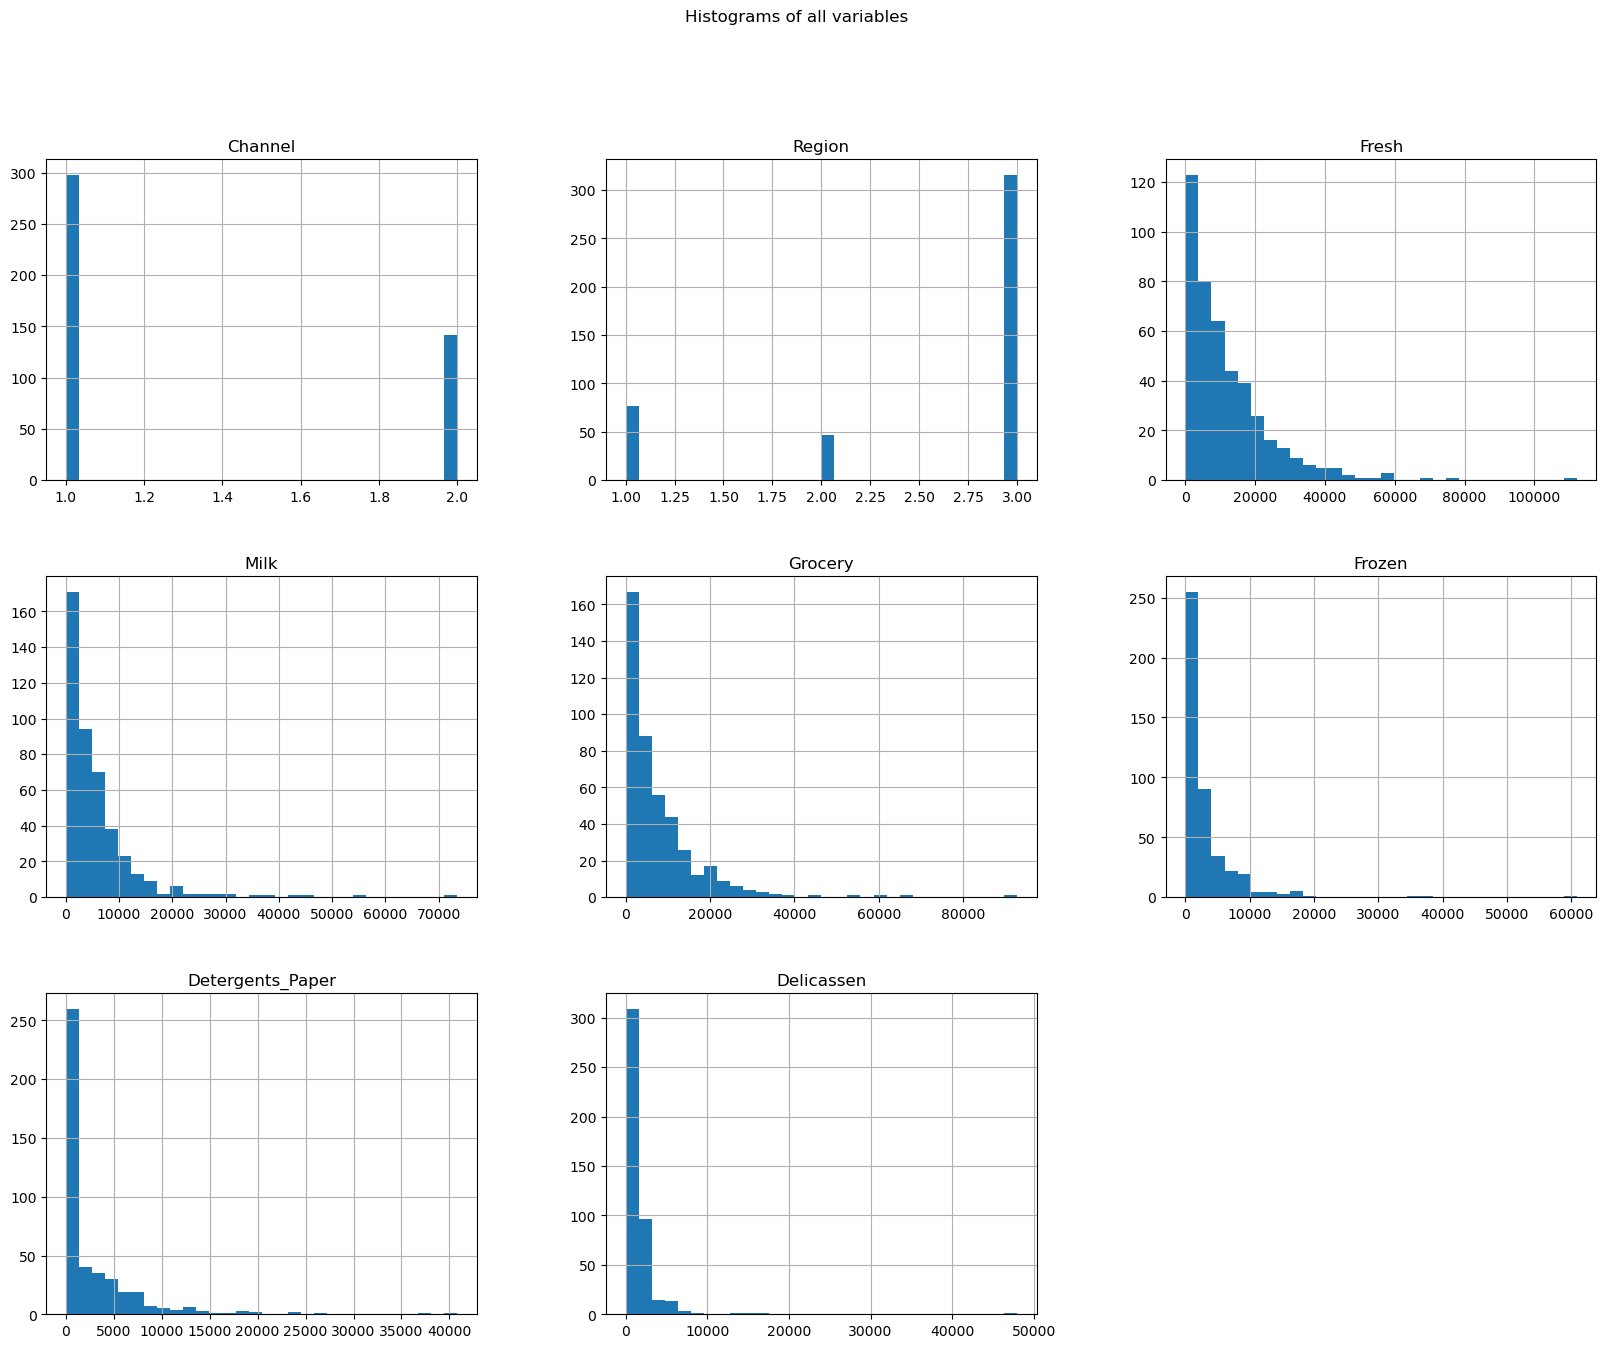

In [7]:
# Histogram for each variable
sales_data_clean.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of all variables')
plt.show()

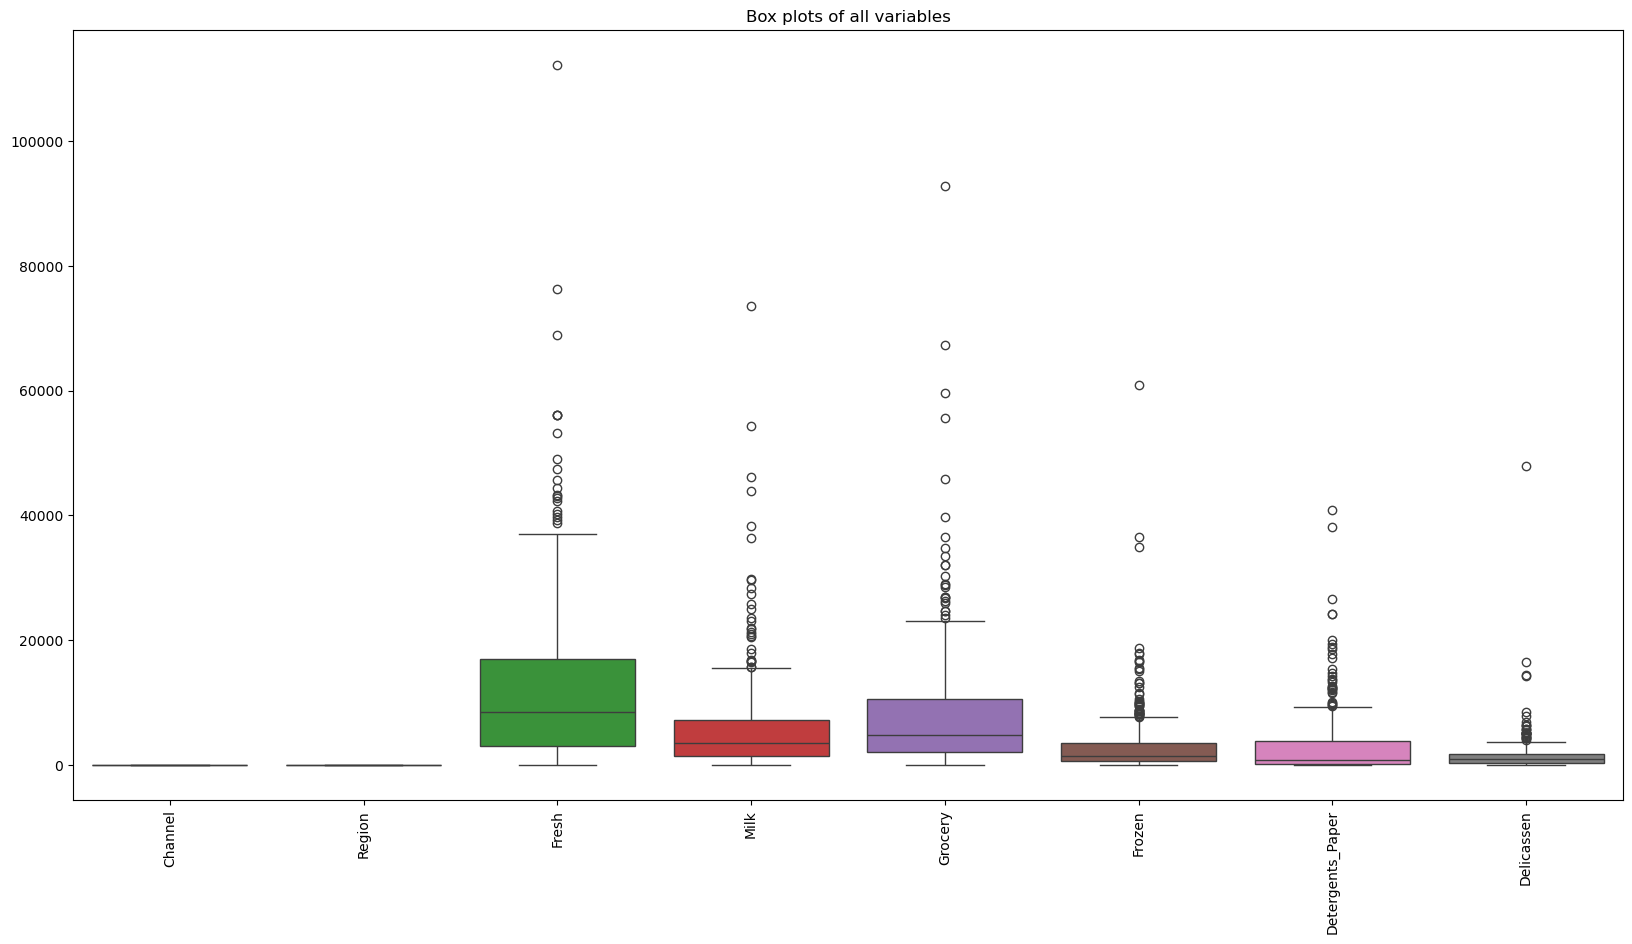

In [8]:
# Box plot for each variable
plt.figure(figsize=(20, 10))
sns.boxplot(data=sales_data_clean)
plt.title('Box plots of all variables')
plt.xticks(rotation=90)
plt.show()

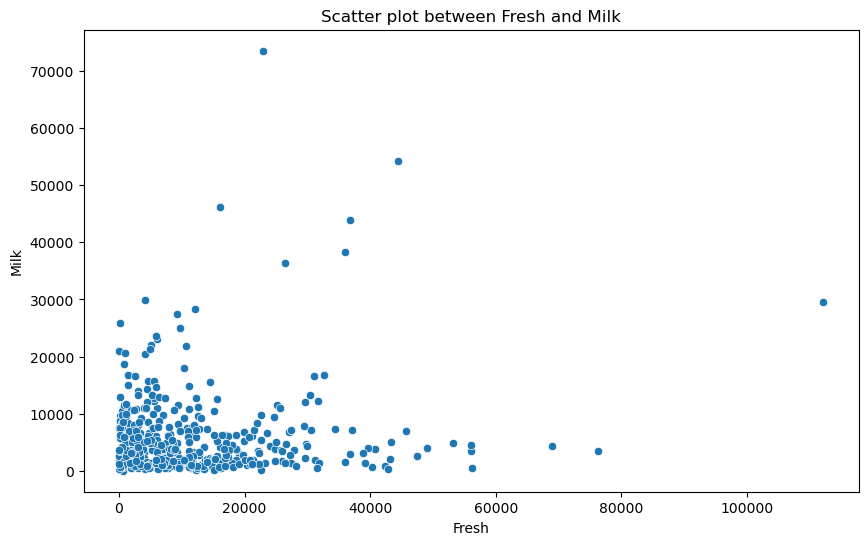

In [9]:
# Scatter plot between "Fresh" and "Milk"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fresh', y='Milk', data=sales_data_clean)
plt.title('Scatter plot between Fresh and Milk')
plt.show()

In [10]:
# Z-score method to detect outliers, looked into these on Google as quick ways to find outliers
z_scores = stats.zscore(sales_data_clean.select_dtypes(include=[float, int]))
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_no_outliers = sales_data_clean[filtered_entries]

# Display the cleaned dataset without outliers
df_no_outliers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [11]:
# Isolate outliers in the "Fresh" column that are above 40,000
outliers = df_no_outliers[
    (df_no_outliers['Fresh'] > 35000) |
    (df_no_outliers['Milk'] > 15000) |
    (df_no_outliers['Grocery'] > 20000) |
    (df_no_outliers['Frozen'] > 7500) |
    (df_no_outliers['Detergents_Paper'] > 10000) |
    (df_no_outliers['Delicassen'] > 5000)
]

# Drop the outliers from the dataset
sales_data_cleaned = df_no_outliers.drop(outliers.index)

In [12]:
len(sales_data_cleaned)

325

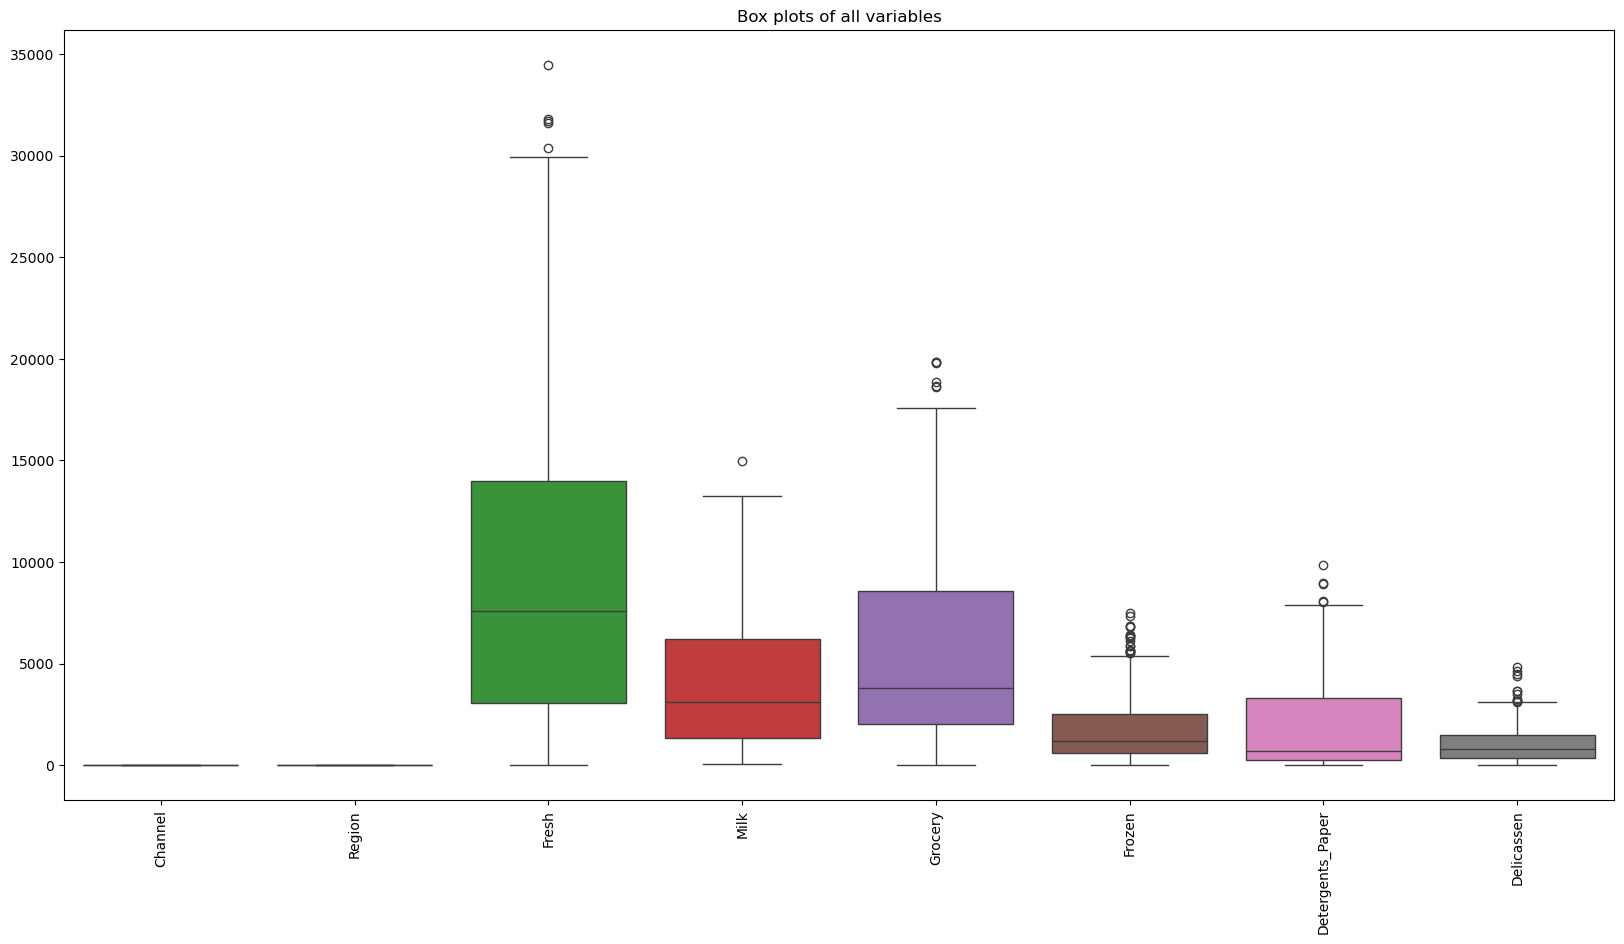

In [13]:
# Box plot for each variable
plt.figure(figsize=(20, 10))
sns.boxplot(data=sales_data_cleaned)
plt.title('Box plots of all variables')
plt.xticks(rotation=90)
plt.show()

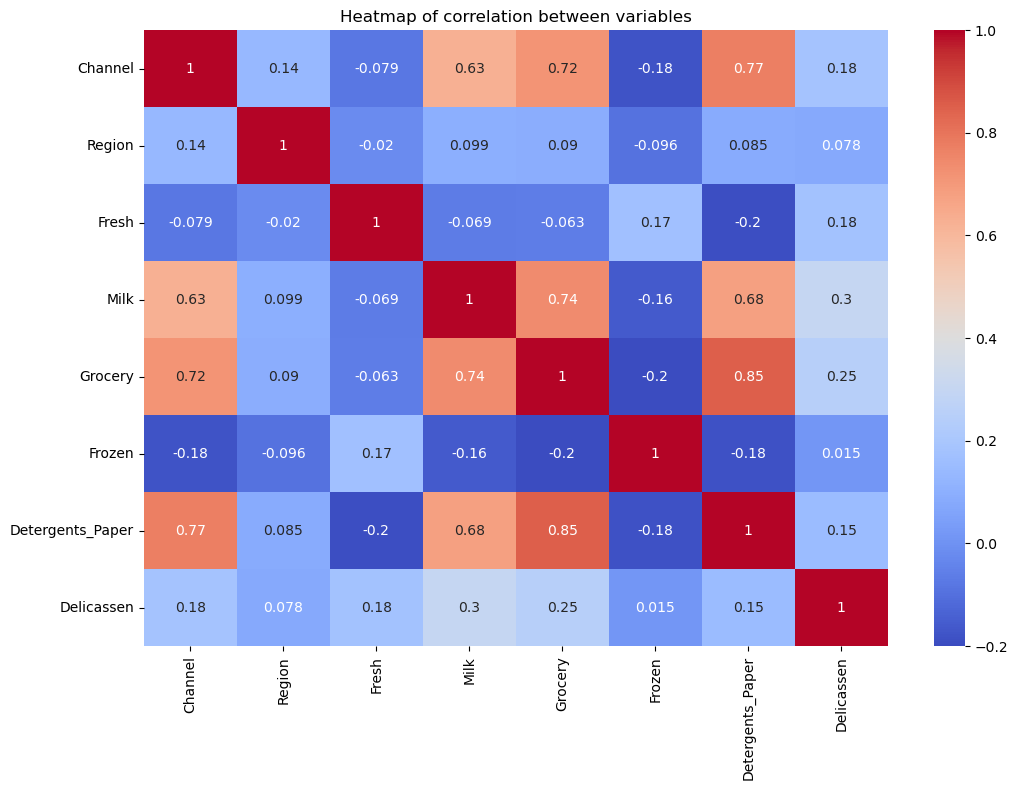

In [14]:
# Heatmap to show correlation between variables
plt.figure(figsize=(12, 8))
correlation_matrix = sales_data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of correlation between variables')
plt.show()

We see that the correlation between Grocery and Detergents_Paper has the strongest correlation at 0.85. 

In [15]:
# Standardize the data
scaler = StandardScaler()
sales_standardized = scaler.fit_transform(sales_data_cleaned)

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

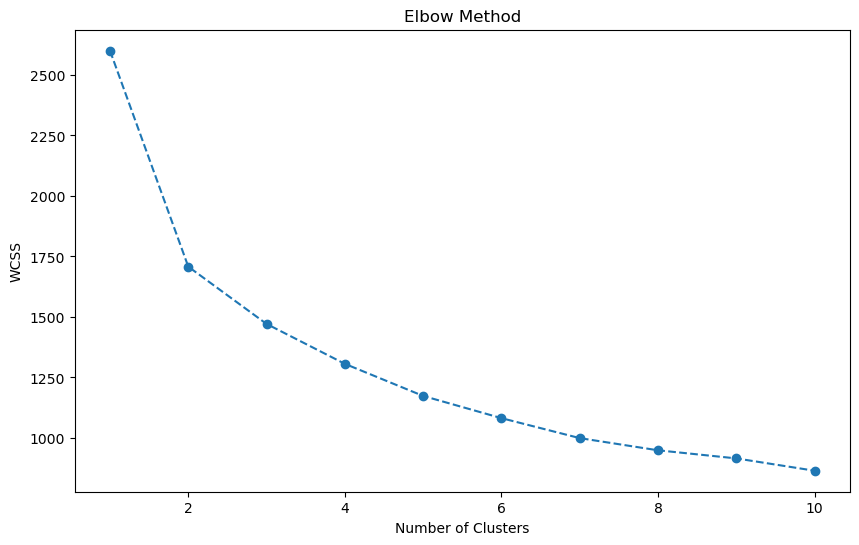

In [16]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(sales_standardized)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
# Perfom clusters
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(sales_standardized)

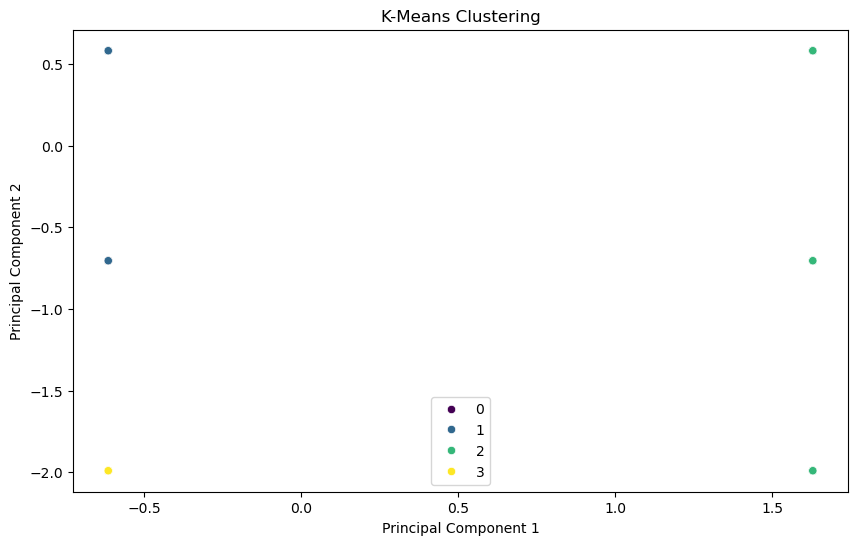

Cluster Profiles:
          Channel    Region         Fresh         Milk       Grocery  \
Cluster                                                                
0        1.000000  2.875000  17755.750000  3195.214286   3544.089286   
1        1.025000  2.941667   6289.025000  2450.508333   3229.341667   
2        1.954545  2.750000   8300.738636  7651.931818  11376.943182   
3        1.032787  1.180328   9829.803279  2680.622951   3652.114754   

              Frozen  Detergents_Paper   Delicassen  
Cluster                                              
0        3477.303571        590.785714  1349.839286  
1        1123.416667        717.683333   827.958333  
2        1267.295455       4961.795455  1375.181818  
3        2405.377049        913.786885   769.049180  


In [18]:
# Add the cluster labels to the original dataframe
sales_data_cleaned['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=sales_standardized[:, 0], y=sales_standardized[:, 1], hue=clusters, palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Profile clusters by calculating summary statistics for each cluster
cluster_profiles = sales_data_cleaned.groupby('Cluster').mean()
print("Cluster Profiles:")
print(cluster_profiles)

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

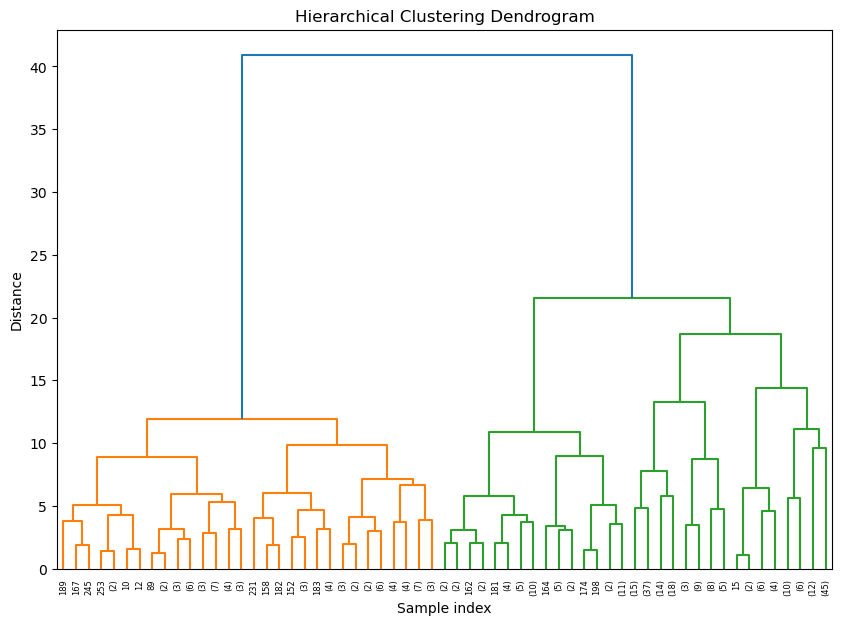

In [19]:
# Perform Hierarchical Clustering
Z = linkage(sales_standardized, method='ward')

# Visualize the Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Assign cluster labels
max_d = 50  # Set the maximum distance threshold
clusters = fcluster(Z, max_d, criterion='distance')

# Add the cluster labels to the original dataframe
sales_data_cleaned['Cluster'] = clusters

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

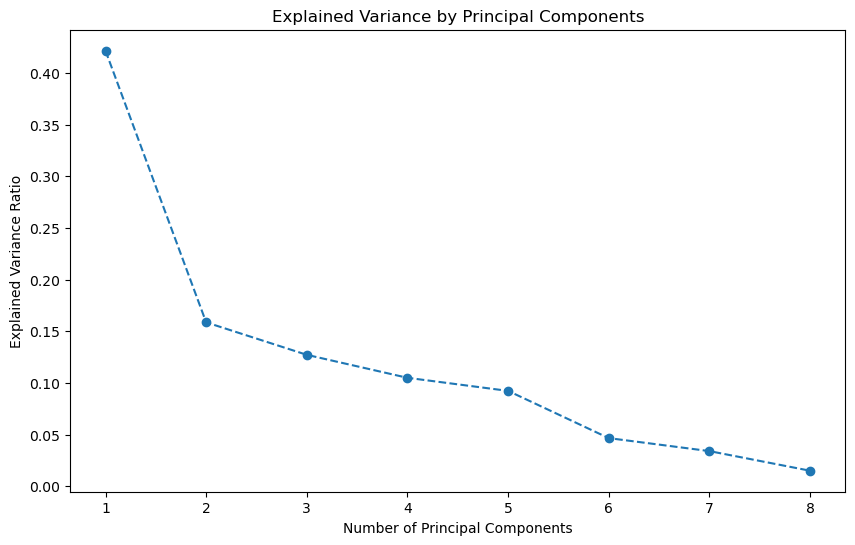

In [20]:
# Perform PCA
pca = PCA(n_components=None)
pca.fit(sales_standardized)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

<h1>Findings</h1>
<ul>
<li><h4 style="color:blue;">Data Cleaning: </h4>The Wholesale dataset was checked for null and negative values. The dataset was found to have no missing values, indicating that it was well-maintained and ready for analysis without the need for removal of rows/columns.  Each column was checked for negative values. In the context of a grocery sales dataset, negative values would be illogical and would need to be corrected or removed.  The dataset was found to have no negative values, which further confirmed that the data was clean and reliable for analysis.</li><br>
<li><h4 style="color:blue;">Outlier Detection: </h4>My analysis of the outliers was best observed using box plots. These gave me the rows that were out of the quartile range. I found 115 outliers that I eliminated from the dataset.</li><br>
<li><h4 style="color:blue;">Correlation Analysis: </h4>The heatmap showed a the biggest correlation was between Grocery and Fresh at 0.85, this means that as the sales of grocery items increase, the sales of detergents and paper products also tend to increase. This strong correlation suggests that customers who purchase grocery items are also likely to purchase detergents and paper products. This could be due to the fact that these items are often bought together during regular shopping trips. I assumed that there would be a bigger correlation between Fresh and Milk but that was a negative relationship, there could be seasonal variations affecting the sales of these items differently.</li><br>
<li><h4 style="color:blue;">Clustering Analysis: </h4>K-Means Clustering: Process: K-Means clustering was performed on the dataset to group similar products into clusters based on their attributes. The Elbow Method was used to determine the optimal number of clusters by plotting the within-cluster sum of squares (WCSS) against the number of clusters.
Findings: The K-Means clustering map showed roughly 4 clusters. This was determined by identifying the "elbow point" in the Elbow Method graph, where the WCSS starts to decrease more slowly.<br>
Hierarchical Clustering: Process: Hierarchical clustering was performed using the Ward's method, and the results were visualized using a dendrogram. The dendrogram helps in understanding the hierarchical structure of the clusters and determining the optimal number of clusters by visually inspecting the tree-like diagram.
Findings: The hierarchical clustering dendrogram showed only 3 clusters after visually cutting it off at a certain height. This cut-off point was chosen based on where the branches of the dendrogram start to merge at a higher distance, indicating distinct clusters.<br>
Principal Component Analysis (PCA): Process: PCA was performed to reduce the dimensionality of the dataset and identify the most important features contributing to the overall variance. The explained variance ratio plot was used to determine the number of principal components that capture a significant portion of the variance.
Findings: PCA had 9 components, with the tail-off happening around 5 components. This means that the first 5 principal components capture most of the variance in the dataset, and additional components contribute less significantly.<br>
Different Cluster Numbers: Observation: It was surprising to have three different cluster numbers from the three clustering techniques. K-Means suggested 4 clusters, Hierarchical Clustering suggested 3 clusters, and PCA indicated that 5 components capture most of the variance.
Interpretation: The differences in the number of clusters can be attributed to the inherent differences in the clustering techniques and their objectives:
K-Means Clustering: This method aims to partition the data into a predefined number of clusters by minimizing the variance within each cluster. The Elbow Method helps in determining the optimal number of clusters, but it can sometimes be subjective.
Hierarchical Clustering: This method builds a hierarchy of clusters and allows for a more flexible determination of the number of clusters by visually inspecting the dendrogram. The cut-off point can vary based on the desired level of granularity.
PCA: While PCA is not a clustering technique, it helps in understanding the underlying structure of the data by reducing its dimensionality. The number of principal components indicates the number of dimensions that capture most of the variance, but it does not directly correspond to the number of clusters.



 </li><br>
</ul>